# Generate Light Curves

# EFM

In [181]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 


f = '/storage/experiments/2024/0627_bourka_JH/kleinwachter/DATALOG.TXT'
f = '/storage/experiments/2024/0628_bourka_hosin/kleinwachter/DATALOG.TXT'


In [213]:
l=[]
l.extend(range(0,20))
df = pd.read_table(f, sep=',', header=None, names=l, comment='*',engine='python' )


In [214]:
df['seconds'] = df.loc[df[0] == '$TIME',1]
df['measurement'] = df.index
df['seconds'] = pd.to_numeric(df['seconds'])
df['offset'] = df.loc[df[0] == '$TIME','measurement']
df['seconds'] = df['seconds'].fillna(method='ffill')
df['offset'] = df['offset'].fillna(method='ffill')
df['milliseconds'] = (df['measurement'] - df['offset']) * 0.089 + df['seconds']


In [215]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

if (len(df.loc[df[0]=='$GNRMC']) > 0):
    print('Warning - Multiconstellation appears')
    print('Use next cell.')
    raise StopExecution
#df.drop(df.loc[(df[0]=='$GPRMC') & (df[2]=='V')].index, inplace=True)
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GPRMC',5])
df['on_milliseconds'] = df['seconds'] * 1000
df['milliseconds'] = df['milliseconds'] * 1000
df['gps_time'] = df.loc[df[0]=='$GPRMC',1]
df['gps_date'] = df.loc[df[0]=='$GPRMC',9]
df['alt'] = df.loc[df[0]=='$GPGGA',9]
df.loc[(df[0]=='$GPRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GPRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GPRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.loc[df[0]=='$HIST',1]
df = df.fillna(method='ffill')
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df.drop(df[df[0]=='$MLYNEK'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['milliseconds'], unit='ms') - pd.to_timedelta(df['on_milliseconds'], unit='ms')
df.drop('date', axis=1, inplace=True)
df.drop('milliseconds', axis=1, inplace=True)
df.drop('on_milliseconds', axis=1, inplace=True)
df


,0,1,2,3,4,5,6,7,8,9,...,18,19,seconds,measurement,offset,alt,lat,lon,meas,UTC
3,-95,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,3,2.0,NaN,NaN,NaN,NaN,NaT
4,7,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,4,2.0,NaN,NaN,NaN,NaN,NaT
5,24,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,5,2.0,NaN,NaN,NaN,NaN,NaT
6,30,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,6,2.0,NaN,NaN,NaN,NaN,NaT
7,34,0,None,None,None,None,None,None,None,None,...,NaN,NaN,0.0,7,2.0,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266405,0,11610,4915.64174,N,01441.51818,E,1,09,1.01,443.9,...,39.0,39.0,11610.0,266405,265409.0,443.9,49.260696,14.69197,NaN,2024-06-28 18:24:42.644
266406,0,11610,4915.64174,N,01441.51818,E,1,09,1.01,443.9,...,39.0,39.0,11610.0,266406,265409.0,443.9,49.260696,14.69197,NaN,2024-06-28 18:24:42.733
266407,0,11610,4915.64174,N,01441.51818,E,1,09,1.01,443.9,...,39.0,39.0,11610.0,266407,265409.0,443.9,49.260696,14.69197,NaN,2024-06-28 18:24:42.822
266408,0,11610,4915.64174,N,01441.51818,E,1,09,1.01,443.9,...,39.0,39.0,11610.0,266408,265409.0,443.9,49.260696,14.69197,NaN,2024-06-28 18:24:42.911


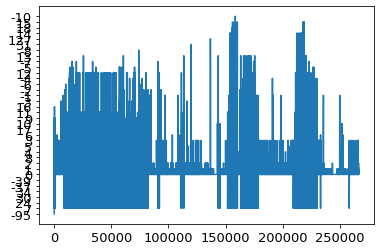

In [168]:
#df.iloc[:5000].loc[df[0] == '$TIME']
plt.plot(df[0])

/tmp/ipykernel_6246/2713114687.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  plt.plot(df[0].loc['2024-06-28 15:45':'2024-06-28 17:30'])


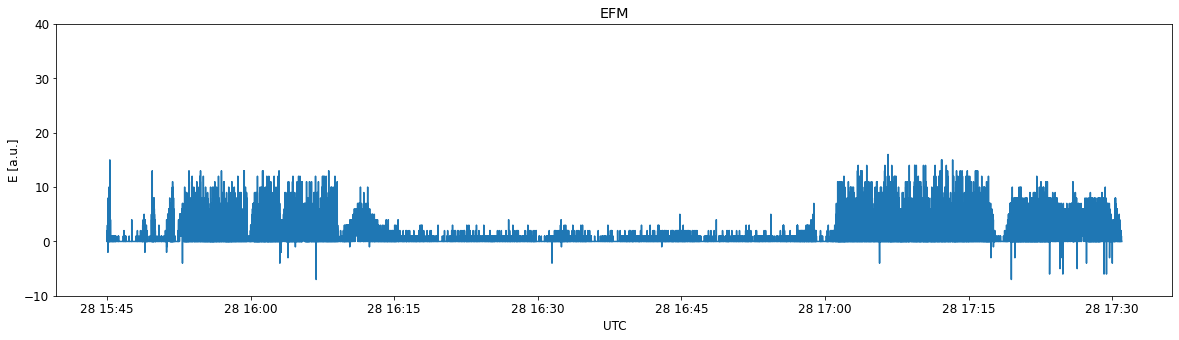

In [216]:
df.set_index('UTC', inplace=True, drop=False)
df.sort_index(inplace=True)
df[0] = pd.to_numeric(df[0])

plt.figure(figsize=(20,5))
plt.rc('font', size=12)    

#plt.plot(df[0].loc['2024-06-27 13:05':'2024-06-27 13:12'])
plt.plot(df[0].loc['2024-06-28 15:45':'2024-06-28 17:30'])
#plt.plot(df[0])
plt.title('EFM')
plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.ylim(-10,40)

kleinwachter = df.copy()

In [65]:
kleinwachter[0].loc['2024-06-27 13:05':'2024-06-27 13:12']

/tmp/ipykernel_6246/3414286154.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  kleinwachter[0].loc['2024-06-27 13:05':'2024-06-27 13:12']


UTC
2024-06-27 13:05:00.079    2
2024-06-27 13:05:00.168    1
2024-06-27 13:05:00.257    2
2024-06-27 13:05:00.346    0
2024-06-27 13:05:00.435    0
                          ..
2024-06-27 13:12:59.623    3
2024-06-27 13:12:59.712    4
2024-06-27 13:12:59.801    4
2024-06-27 13:12:59.890    3
2024-06-27 13:12:59.979    4
Name: 0, Length: 5101, dtype: int64

In [191]:
f = '/storage/experiments/2024/0627_bourka_JH/thundermill/efm.csv'
f = '/storage/experiments/2024/0628_bourka_hosin/thundermill/efm2.csv'
f = '/storage/experiments/2024/0628_bourka_hosin/thundermill/efm.csv.2024-06-28_14'
#f = '/storage/experiments/2024/0628_bourka_hosin/thundermill/EFM_log_20240629_175507_UTC.csv'
f = '/storage/experiments/2024/0628_bourka_hosin/thundermill/test.csv'
f = '/storage/experiments/2024/0703_bourka_D3/EFM/hliniklog_20240703_175748_UTC.csv'

l=[]
l.extend(range(0,20))
df = pd.read_table(f, sep=',', header=None, comment='*',engine='python' )


In [192]:
df['time'] = pd.to_datetime(df[0], unit='s')

In [193]:
df.set_index('time', inplace=True, drop=False)

In [209]:
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,time
time,,,,,,,,,,,,,,,,,,,,,
2024-06-28 17:45:47.029999872,1.719597e+09,122,128,124,119,120,124,119,117,122,...,105,100,106,115,116,118,129,126,121,2024-06-28 17:45:47.029999872
2024-06-28 17:45:47.080000000,1.719597e+09,118,125,122,117,119,135,132,125,131,...,101,96,104,113,116,118,128,125,120,2024-06-28 17:45:47.080000000
2024-06-28 17:45:47.109999872,1.719597e+09,125,133,127,124,125,130,124,120,125,...,100,97,104,114,114,116,127,124,119,2024-06-28 17:45:47.109999872
2024-06-28 17:45:47.160000000,1.719597e+09,121,128,124,120,122,127,121,118,122,...,100,96,104,114,114,119,130,125,122,2024-06-28 17:45:47.160000000
2024-06-28 17:45:47.200000000,1.719597e+09,120,127,123,118,118,124,120,116,122,...,105,101,105,114,115,118,128,124,120,2024-06-28 17:45:47.200000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28 18:22:56.509999872,1.719599e+09,116,121,118,115,116,120,114,112,114,...,106,104,110,116,114,112,121,119,115,2024-06-28 18:22:56.509999872
2024-06-28 18:22:56.520000000,1.719599e+09,113,119,115,111,112,116,110,107,111,...,110,106,110,114,111,112,121,118,114,2024-06-28 18:22:56.520000000
2024-06-28 18:22:56.569999872,1.719599e+09,110,116,112,107,117,127,122,118,124,...,107,103,108,114,112,111,120,117,113,2024-06-28 18:22:56.569999872


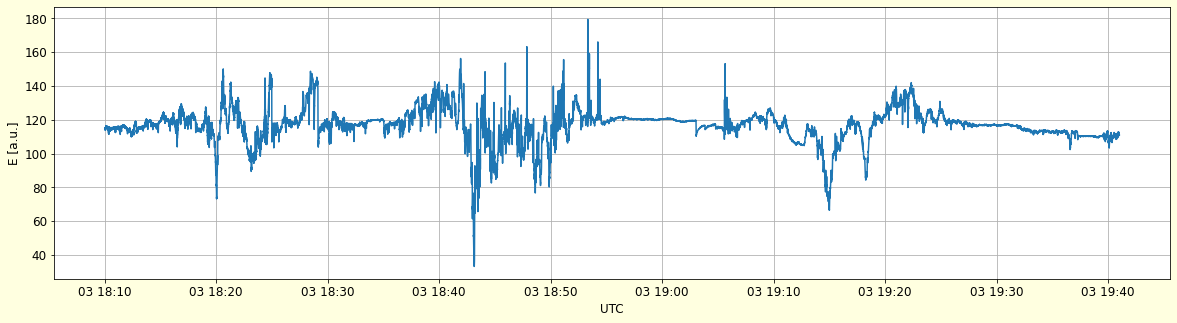

In [194]:
plt.figure(figsize=(20,5), facecolor='lightyellow')
plt.rc('font', size=12)    

df['mean'] = df[30].rolling(20).mean()
#df['mean'] = df.iloc[:,20:30].mean(axis=1)
#df['mean'] = df.iloc[:,1:].max(axis=1)-df.iloc[:,1:].min(axis=1)

#plt.plot(df.loc['2024-06-27 15:05':'2024-06-27 15:12','mean'])
#plt.plot(df.loc['2024-06-28 15:03:30':'2024-06-28 15:04:00','mean'])
plt.plot(df.loc['2024-07-03 18:10':'2024-07-03 19:40','mean'])
#plt.plot(df['mean'])
#plt.ylim(10,140)
plt.xlabel('UTC')
plt.ylabel('E [a.u.]')
plt.grid()
thundermill = df.copy()

<AxesSubplot:>

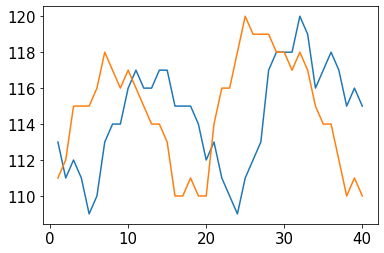

In [195]:

#TIME = pd.to_datetime('2024-06-28 15:04:03.6')
TIME = pd.to_datetime('2024-07-03 18:10')
TIMEEND = TIME + pd.to_timedelta(0.1, 's')
                                 
df.loc[TIME:TIMEEND,1:40].apply(pd.to_numeric).T.plot(legend=None)



In [571]:
df.loc[TIME:TIMEEND,10:20]

,10,11,12,13,14,15,16,17,18,19,20
time,,,,,,,,,,,
2024-06-29 18:02:02.711718144,121,119,118,119,111,105,107,107,104,104,109
2024-06-29 18:02:02.755549440,121,119,118,119,110,105,107,107,105,104,108
2024-06-29 18:02:02.799573760,121,166,44,124,129,118,109,105,102,103,108


In [186]:
region = 18

# letiste JH
lat = 49.1550256 
lon = 14.9626967
start=pd.to_datetime('2024-06-27 13:00:00')
end=pd.to_datetime('2024-06-27 13:20:00')
BLITZ_DIST = 60

# Hosin
lat = 49.0424511
lon = 14.4718486
start=pd.to_datetime('2024-06-28 16:00:00')
end=pd.to_datetime('2024-06-28 16:20:00')
BLITZ_DIST = 60

#sitename = 'Kozi hradek'
lat=49.3902911 
lon=14.7261739
start=pd.Timestamp('2024-07-03 18:00')
end=pd.Timestamp('2024-07-03 19:45')
BLITZ_DIST = 30

### url for json data preparation
url=[]
for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Protected/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))

import requests
blitz=pd.DataFrame()

for i in range(len(url)):
    try:
        html = requests.get(url[i], auth=('meteopress', 'vactoV-bixso0-zohroq')).content
        blitz_part = pd.read_json(html.decode("utf-8"),lines=True)
        #blitz_part.drop(columns=['status','sig'], inplace=True)#,'region', 
        blitz = pd.concat([blitz,blitz_part])
    except:
        print("No data", url[i])

blitz.set_index(['time'], inplace=True)

### reduction of too distant events
blitz=blitz[(blitz['lat']>(lat-1) )&(blitz['lat']<(lat+1) )]
blitz=blitz[(blitz['lon']>(lon-1) )&(blitz['lon']<(lon+1) )]
### calculation of distance of events from station
#from math import radians, cos, sin, asin, sqrt, atan2, degrees

#with pandas
blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz.drop(columns=['lonRad','latRad','DlonRad','DlatRad','a'], inplace=True)
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, reghttps://www.facebook.com/messages/t/7715926388499505ion)')
#blitz['time']=blitz.index    
blitz = blitz.loc[blitz['km'] < BLITZ_DIST]
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
blitz.reset_index(inplace=True)
blitz.set_index('date', inplace=True)

print('end')

end


/tmp/ipykernel_6246/608884608.py:22: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax1.plot(kleinwachter['mean'].loc['2024-06-28 15:00':'2024-06-28 16:20'], label='Kleinwachter')


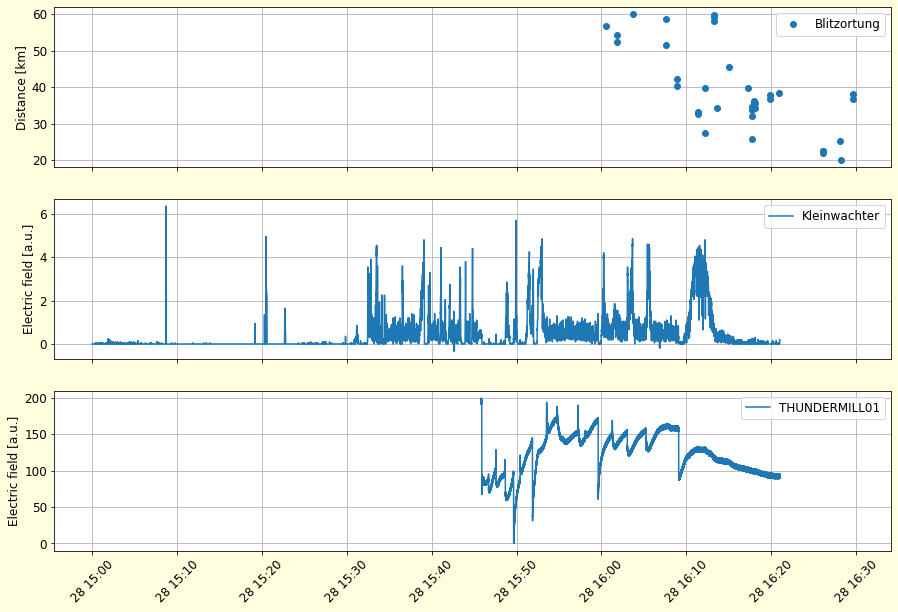

In [447]:
import matplotlib

# 18:30 CEST 16:30 UT
# 19:30 CEST 17:30 UT
# 17:45 - 18:22 CEST thundermill
# 15:45 - 16:22 UT kleinwachter

matplotlib.rcParams.update({'font.size': 12})
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15,10), facecolor='lightyellow')


blitz['date'] = pd.to_datetime(blitz['time'], unit='ns')
ax0.plot(blitz.date, blitz.km, ls='', marker='o', label='Blitzortung')
ax0.set_ylabel('Distance [km]')
#ax0.set_ylim(0,30)
ax0.legend()
ax0.grid()

kleinwachter['mean'] = kleinwachter[0].rolling(20).mean()

#ax1.plot(kleinwachter[0].loc['2024-06-27 13:00':'2024-06-27 13:30'], label='Kleinwachter')
ax1.plot(kleinwachter['mean'].loc['2024-06-28 15:00':'2024-06-28 16:20'], label='Kleinwachter')
#ax1.set_ylim(0,360)
ax1.set_ylabel('Electric field [a.u.]')
ax1.grid()
ax1.legend()

thundermill['mean'] = thundermill.iloc[:,20:30].mean(axis=1)

thundermill['UTC'] = thundermill['time'] #- pd.Timedelta(hours=2)
thundermill.reset_index(drop=True)
thundermill.set_index('UTC', inplace=True, drop=False)

#ax2.plot(thundermill.loc['2024-06-27 13:00':'2024-06-27 13:30','mean'], label='THUNDERMILL01')
ax2.plot(thundermill.loc['2024-06-28 15:00':'2024-06-28 16:20','mean'], label='THUNDERMILL01')
ax2.set_ylabel('Electric field [a.u.]')
ax2.tick_params(axis='x', labelrotation=45)
ax2.grid()
ax2.legend()


/tmp/ipykernel_6246/1536131850.py:17: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax1.plot(kleinwachter[0].loc['2024-06-27 13:00':'2024-06-27 13:30'], label='Kleinwachter')


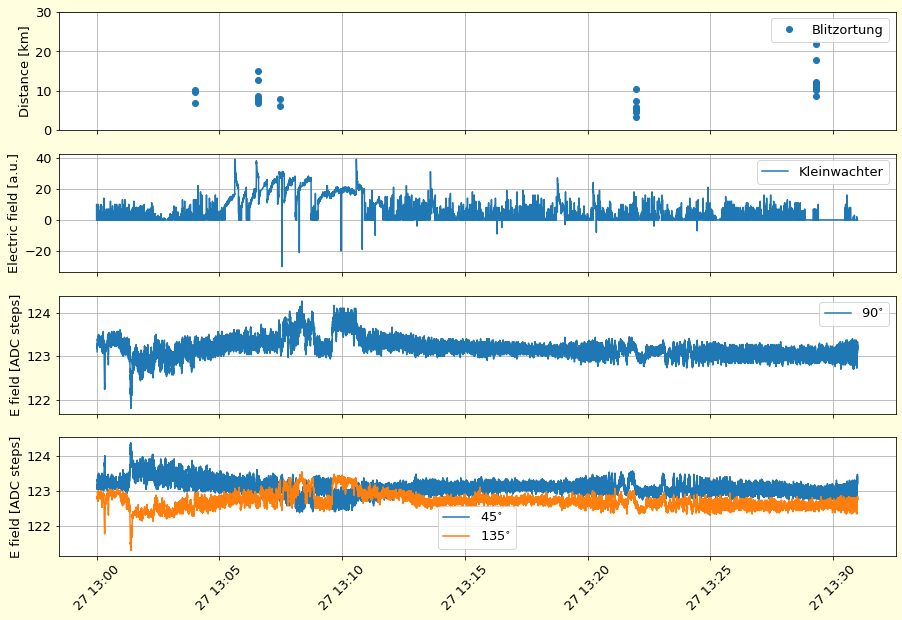

In [162]:
import matplotlib

matplotlib.rcParams.update({'font.size': 13})
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, sharex=True, figsize=(15,10), facecolor='lightyellow')


#thundermill['mean'] = thundermill.iloc[:,1:-3].max(axis=1).rolling(40).mean()
thundermill['mean'] = thundermill[10].rolling(40).mean()

blitz['date'] = pd.to_datetime(blitz['time'], unit='ns')
ax0.plot(blitz.date, blitz.km, ls='', marker='o', label='Blitzortung')
ax0.set_ylabel('Distance [km]')
ax0.set_ylim(0,30)
ax0.legend()
ax0.grid()

ax1.plot(kleinwachter[0].loc['2024-06-27 13:00':'2024-06-27 13:30'], label='Kleinwachter')
#ax1.set_ylim(0,360)
ax1.set_ylabel('Electric field [a.u.]')
ax1.grid()
ax1.legend()

thundermill['UTC'] = thundermill['time'] - pd.Timedelta(hours=2)
thundermill.reset_index(drop=True)
thundermill.set_index('UTC', inplace=True, drop=False)

ax2.plot(thundermill.loc['2024-06-27 13:00':'2024-06-27 13:30',20].rolling(30).mean(), label='90$^{\circ}$')
ax2.set_ylabel('E field [ADC steps]')
#ax2.tick_params(axis='x', labelrotation=45)
ax2.grid()
ax2.legend()

ax3.plot(thundermill.loc['2024-06-27 13:00':'2024-06-27 13:30',10].rolling(30).mean(), label='45$^{\circ}$')
ax3.plot(thundermill.loc['2024-06-27 13:00':'2024-06-27 13:30',30].rolling(30).mean(), label='135$^{\circ}$')
ax3.set_ylabel('E field [ADC steps]')
ax3.tick_params(axis='x', labelrotation=45)
ax3.grid()
ax3.legend()


/tmp/ipykernel_6246/3613795356.py:17: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax1.plot(kleinwachter[0].loc['2024-06-28 15:40':'2024-06-28 16:20'], label='Kleinwachter')


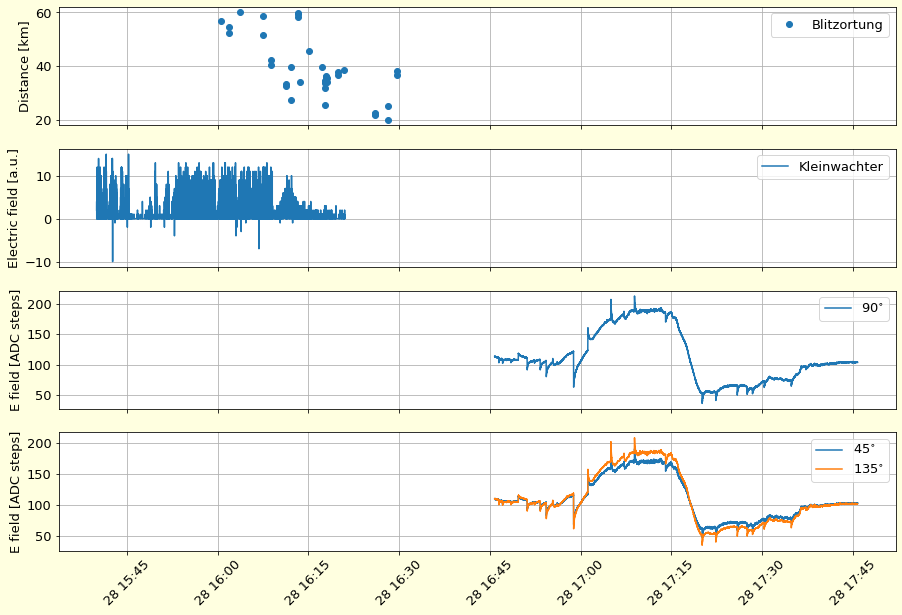

In [465]:
import matplotlib

matplotlib.rcParams.update({'font.size': 13})
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, sharex=True, figsize=(15,10), facecolor='lightyellow')


#thundermill['mean'] = thundermill.iloc[:,1:-3].max(axis=1).rolling(40).mean()
thundermill['mean'] = thundermill[10].rolling(40).mean()

blitz['date'] = pd.to_datetime(blitz['time'], unit='ns')
ax0.plot(blitz.date, blitz.km, ls='', marker='o', label='Blitzortung')
ax0.set_ylabel('Distance [km]')
#ax0.set_ylim(0,30)
ax0.legend()
ax0.grid()

ax1.plot(kleinwachter[0].loc['2024-06-28 15:40':'2024-06-28 16:20'], label='Kleinwachter')
#ax1.set_ylim(0,360)
ax1.set_ylabel('Electric field [a.u.]')
ax1.grid()
ax1.legend()

thundermill['UTC'] = thundermill['time'] #- pd.Timedelta(hours=2)
thundermill.reset_index(drop=True)
thundermill.set_index('UTC', inplace=True, drop=False)

#ax2.plot(thundermill.loc['2024-06-28 15:40':'2024-06-28 16:20',20].rolling(30).mean(), label='90$^{\circ}$')
ax2.plot(thundermill[20].rolling(30).mean(), label='90$^{\circ}$')
ax2.set_ylabel('E field [ADC steps]')
#ax2.tick_params(axis='x', labelrotation=45)
ax2.grid()
ax2.legend()

ax3.plot(thundermill[16].rolling(30).mean(), label='45$^{\circ}$')
ax3.plot(thundermill[32].rolling(30).mean(), label='135$^{\circ}$')
ax3.set_ylabel('E field [ADC steps]')
ax3.tick_params(axis='x', labelrotation=45)
ax3.grid()
ax3.legend()


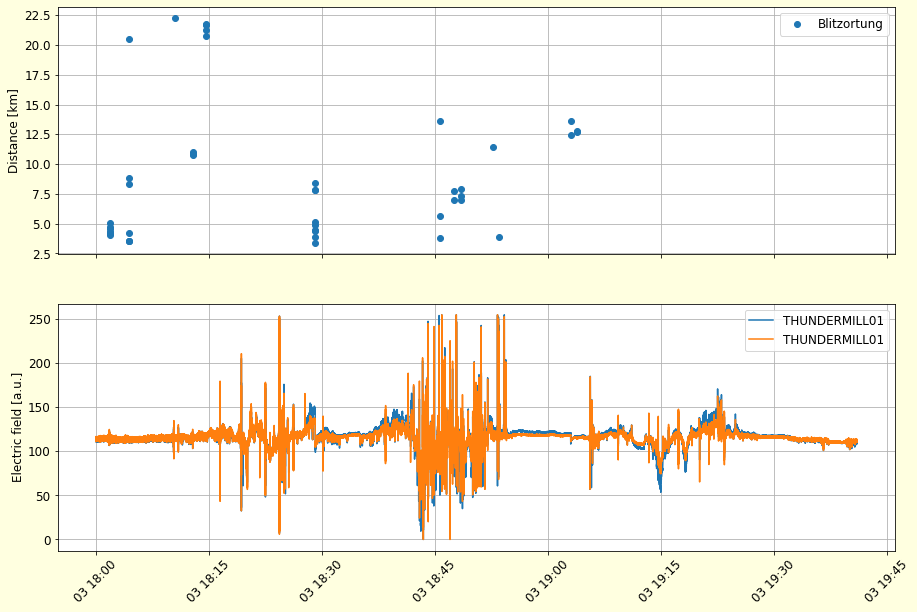

In [142]:
import matplotlib

# 18:30 CEST 16:30 UT
# 19:30 CEST 17:30 UT
# 17:45 - 18:22 CEST thundermill
# 15:45 - 16:22 UT kleinwachter

matplotlib.rcParams.update({'font.size': 12})
fig, (ax0, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,10), facecolor='lightyellow')


blitz['date'] = pd.to_datetime(blitz['time'], unit='ns')
ax0.plot(blitz.date, blitz.km, ls='', marker='o', label='Blitzortung')
ax0.set_ylabel('Distance [km]')
#ax0.set_ylim(0,30)
ax0.legend()
ax0.grid()


thundermill['mean'] = thundermill.iloc[:,32:37].mean(axis=1)
thundermill['mean2'] = thundermill.iloc[:,25:30].mean(axis=1)

thundermill['UTC'] = thundermill['time'] #- pd.Timedelta(hours=2)
thundermill.reset_index(drop=True)
thundermill.set_index('UTC', inplace=True, drop=False)

#ax2.plot(thundermill.loc['2024-06-27 13:00':'2024-06-27 13:30','mean'], label='THUNDERMILL01')
ax2.plot(thundermill.loc['2024-07-03 18:00':'2024-07-03 19:40','mean'].rolling(2).mean(), label='THUNDERMILL01')
ax2.plot(thundermill.loc['2024-07-03 18:00':'2024-07-03 19:40','mean2'].rolling(2).mean(), label='THUNDERMILL01')
ax2.set_ylabel('Electric field [a.u.]')
ax2.tick_params(axis='x', labelrotation=45)
ax2.grid()
ax2.legend()
#ax2.set_xlim(pd.to_datetime('2024-07-03 18:48'),pd.to_datetime('2024-07-03 18:49'))


In [188]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

dftd = thundermill.copy()
plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

def plot_graph(steps):
    
    time = pd.to_datetime('2024-07-03 18:46:00') + pd.to_timedelta(steps/10, 's')    

    plt.figure(figsize=(20,5), facecolor='lightyellow')
    matplotlib.rcParams.update({'font.size': 15})

    label = 'THUNDERMILL xx°'
    color = 'red'
    factor = 1 # kV/m . DIV 
    #plt.plot(((dftd.iloc[:,100]-250)*factor), label=label, color=color, alpha=0.7)
    plt.plot(((dftd.iloc[:,30])*factor), label=label, color=color, alpha=0.7)

    #plt.plot(dfs[3], alpha=0.9, color='green', label='Boltek')
    #plt.ylim(-150,150)
    plt.vlines([time],ymin=0,ymax=255, lw=5, color='lightgreen')

    plt.xlim(pd.to_datetime('2024-07-03 18:40'),pd.to_datetime('2024-07-03 19:00'))
    
    #plt.xlim('2024-07-1 9:00','2024-7-1 10:35')
    plt.legend(loc=2)


    plt.figure(figsize=(20,5), facecolor='lightyellow')
    matplotlib.rcParams.update({'font.size': 15})
    
    timeend = time + pd.to_timedelta(0.1, 's')

    ((df.loc[time:timeend].iloc[:,2:40].reset_index(drop=True).T)).plot(legend=None)
    #plt.ylim(0,500)
    plt.xticks([2, 11, 21, 31, 40],[0,45,90,90+45,180])
    #plt.ylim(-156,156)
    plt.title(time)
    plt.xlabel('Rotor phase [°]')
    plt.ylabel('Voltage  [ADC steps]')
    plt.show()
    
interact(plot_graph, steps=widgets.IntSlider(min=0, max=200), step=1, value=64, style={'description_width': 'initial'}, layout=widgets.Layout(width='800px'))
 

<Figure size 1440x360 with 0 Axes>

interactive(children=(IntSlider(value=0, description='steps', max=200), Output()), _dom_classes=('widget-inter…

<function __main__.plot_graph(steps)>

In [147]:
dftd

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,time,mean,UTC,mean2
UTC,,,,,,,,,,,,,,,,,,,,,
2024-07-03 17:57:49.082076928,1.720029e+09,118,117,117,117,115,113,113,112,110,...,119,117,116,117,116,115,2024-07-03 17:57:49.082076928,117.0,2024-07-03 17:57:49.082076928,108.2
2024-07-03 17:57:49.085292032,1.720029e+09,115,116,119,120,120,119,120,120,119,...,111,109,107,108,107,109,2024-07-03 17:57:49.085292032,111.6,2024-07-03 17:57:49.085292032,117.0
2024-07-03 17:57:49.139225088,1.720029e+09,114,112,113,112,110,110,112,116,118,...,116,114,114,115,114,112,2024-07-03 17:57:49.139225088,114.8,2024-07-03 17:57:49.139225088,107.8
2024-07-03 17:57:49.155392512,1.720029e+09,121,120,121,121,120,119,121,120,119,...,108,107,108,113,115,116,2024-07-03 17:57:49.155392512,108.2,2024-07-03 17:57:49.155392512,114.6
2024-07-03 17:57:49.197224704,1.720029e+09,115,112,113,112,110,109,113,116,117,...,117,115,114,116,116,114,2024-07-03 17:57:49.197224704,116.4,2024-07-03 17:57:49.197224704,111.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03 21:03:43.941382912,1.720041e+09,117,117,118,117,116,116,115,113,112,...,115,117,117,117,118,117,2024-07-03 21:03:43.941382912,113.8,2024-07-03 21:03:43.941382912,111.8
2024-07-03 21:03:43.984069120,1.720041e+09,114,113,114,112,110,111,113,114,114,...,116,117,116,115,116,116,2024-07-03 21:03:43.984069120,116.6,2024-07-03 21:03:43.984069120,112.2
2024-07-03 21:03:44.027143168,1.720041e+09,110,111,114,115,116,117,118,118,117,...,114,115,113,112,112,111,2024-07-03 21:03:44.027143168,115.2,2024-07-03 21:03:44.027143168,117.2


<Figure size 1440x720 with 0 Axes>

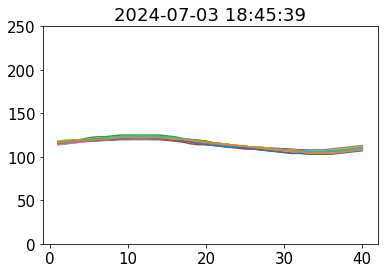

<Figure size 1440x720 with 0 Axes>

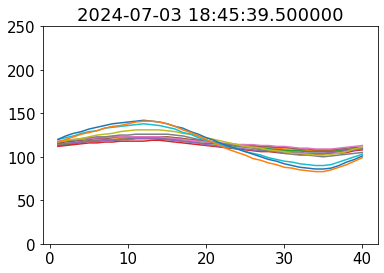

<Figure size 1440x720 with 0 Axes>

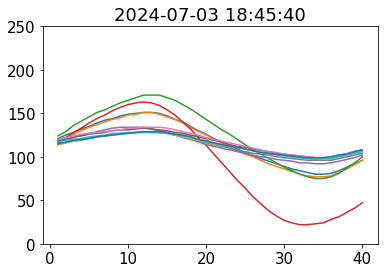

<Figure size 1440x720 with 0 Axes>

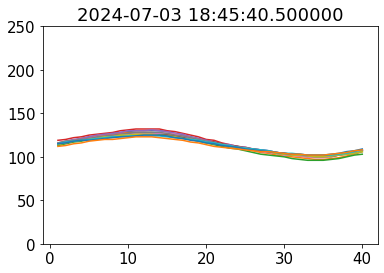

<Figure size 1440x720 with 0 Axes>

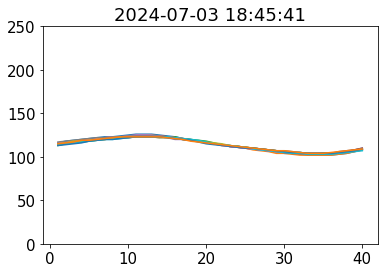

<Figure size 1440x720 with 0 Axes>

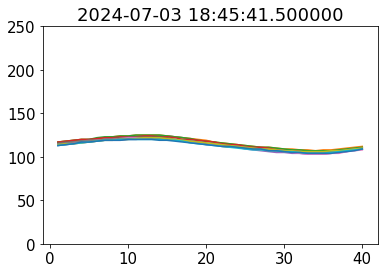

<Figure size 1440x720 with 0 Axes>

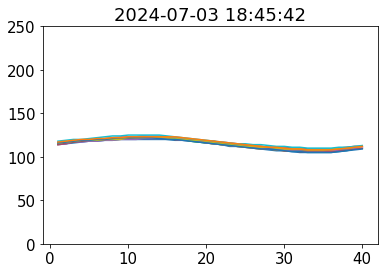

<Figure size 1440x720 with 0 Axes>

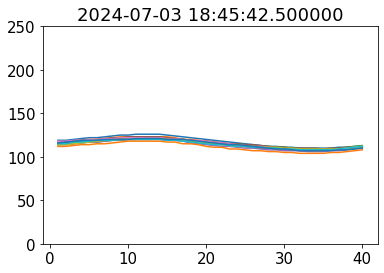

<Figure size 1440x720 with 0 Axes>

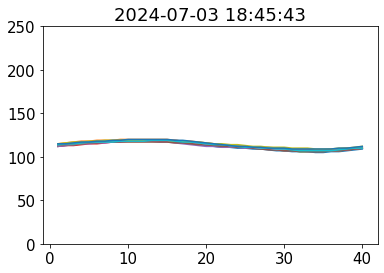

<Figure size 1440x720 with 0 Axes>

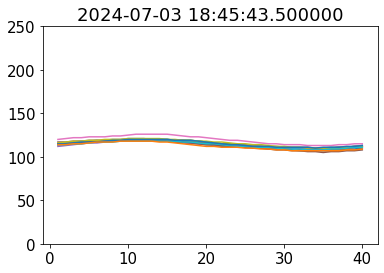

In [189]:

df = thundermill
                                 
for n in range(0,50,5):
    try:
        #TIME = pd.to_datetime('2024-07-01 9:30:00') + pd.to_timedelta(n, 'minute')
        #TIME = pd.to_datetime('2024-07-01 0:05:00') + pd.to_timedelta(n, 'minute')
        TIME = pd.to_datetime('2024-07-03 18:45:39') + pd.to_timedelta(n/10, 's')
        TIMEEND = TIME + pd.to_timedelta(0.5, 's')
        plt.figure(figsize=(20,10), facecolor='lightyellow')
        matplotlib.rcParams.update({'font.size': 15})
        df.loc[TIME:TIMEEND,1:40].T.plot(legend=None)
        plt.ylim(0,250)
        plt.title(TIME)
        plt.show()
    except:
        continue


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
UTC,,,,,,,,,,,,,,,,,,,,,
2024-07-03 18:45:58.040271360,114,115,116,116,117,117,118,119,120,121,...,103,102,102,102,102,103,103,105,107,108
2024-07-03 18:45:58.083359232,113,115,116,117,118,119,120,122,122,123,...,103,103,102,102,102,102,103,104,106,107
2024-07-03 18:45:58.126365696,115,117,118,119,120,122,123,123,124,124,...,102,101,100,100,100,101,102,103,105,107
2024-07-03 18:45:58.169170944,114,115,116,117,118,119,120,120,121,122,...,101,101,101,100,101,101,102,104,105,107
2024-07-03 18:45:58.212641792,114,116,117,119,120,121,123,124,125,126,...,104,104,103,103,103,103,104,106,107,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03 18:46:02.789207040,119,119,119,120,120,121,121,122,122,122,...,112,112,111,111,111,111,112,112,112,113
2024-07-03 18:46:02.832180480,116,117,118,118,119,119,119,120,120,120,...,110,110,110,110,110,110,111,111,112,113
2024-07-03 18:46:02.875513856,117,118,118,119,119,119,119,119,119,120,...,111,111,110,111,110,111,111,112,113,113


/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-48-35.mp4.csv


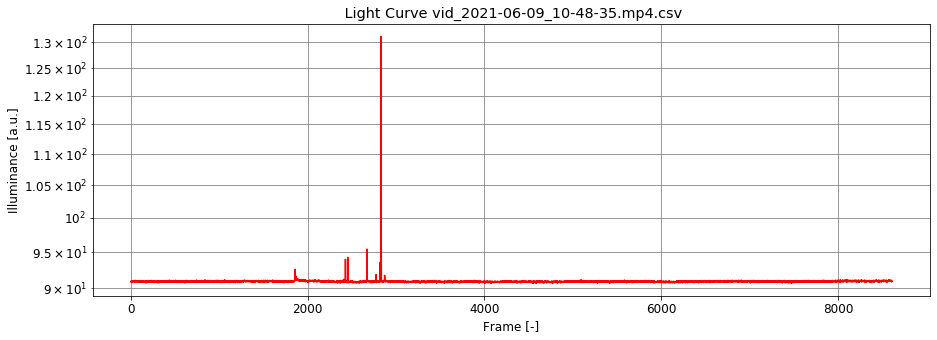

In [176]:
f = '/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv'
time0 = '2021-08-07 19:53:42'
timediff = -1000 # ms

f = '/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv'
time0 = '2021-08-07 19:59:56'
timediff = -1000 # ms

f = '/storage/experiments/2021/0609_bourka_sobeslav/video/vid_2021-06-09_10-48-35.mp4.csv'
time0 = '2021-06-09 10:48:35'
timediff = -1000 # ms

s = f.split('/')
st = s[len(s)-1]
print(f)
y = pd.read_csv(f)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(y['0'], color='r')
plt.yscale('log')
plt.title(' Light Curve ' + st)
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
#plt.xticks(np.arange(0, 4000, 100))
#plt.ticklabel_format(style='sci', axis='y')


Text(0.5, 0, 'UTC')

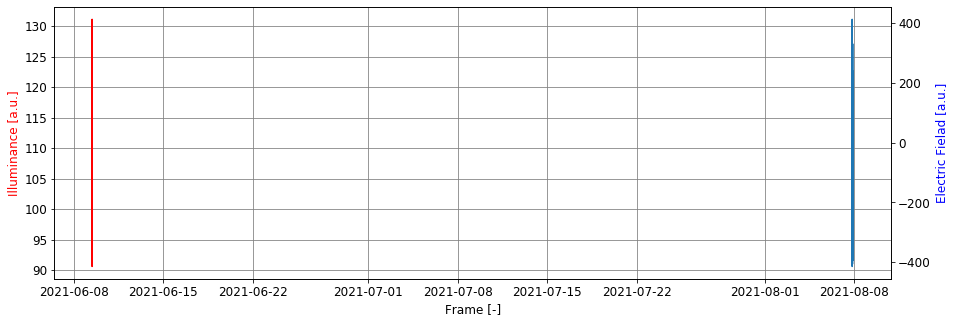

In [111]:
snap_time = 620 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

#xx = df.loc['2021-08-07 19:59:50':'2021-08-07 20:00:00']
xx = df

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(yy['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]', color='red')

plt.twinx()

plt.plot(xx[0], drawstyle='steps-post')
plt.ylabel('Electric Fielad [a.u.]', color='blue')
plt.xlabel('UTC')




(90, 100)

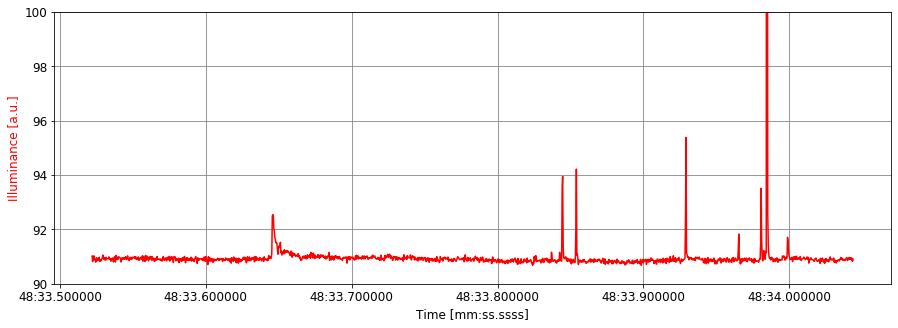

In [177]:
snap_time = 620 # us
snap_time = 348 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)
#yy = yy.loc['2021-06-09 10:48:33':'2021-06-09 10:48:33']
yy = yy.iloc[1500:3000]

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(yy['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Time [mm:ss.ssss]')
plt.ylabel('Illuminance [a.u.]', color='red')
plt.ylim(90,100)


In [165]:
yy

,Unnamed: 0,0,time
time,,,
2021-06-09 10:48:33.000348,1,90.903473,2021-06-09 10:48:33.000348
2021-06-09 10:48:33.000696,2,90.891038,2021-06-09 10:48:33.000696
2021-06-09 10:48:33.001044,3,90.930271,2021-06-09 10:48:33.001044
2021-06-09 10:48:33.001392,4,90.941939,2021-06-09 10:48:33.001392
2021-06-09 10:48:33.001740,5,90.967835,2021-06-09 10:48:33.001740
...,...,...,...
2021-06-09 10:48:33.033060,95,90.960573,2021-06-09 10:48:33.033060
2021-06-09 10:48:33.033408,96,90.946428,2021-06-09 10:48:33.033408
2021-06-09 10:48:33.033756,97,90.879476,2021-06-09 10:48:33.033756


Text(0.5, 0, 'UTC')

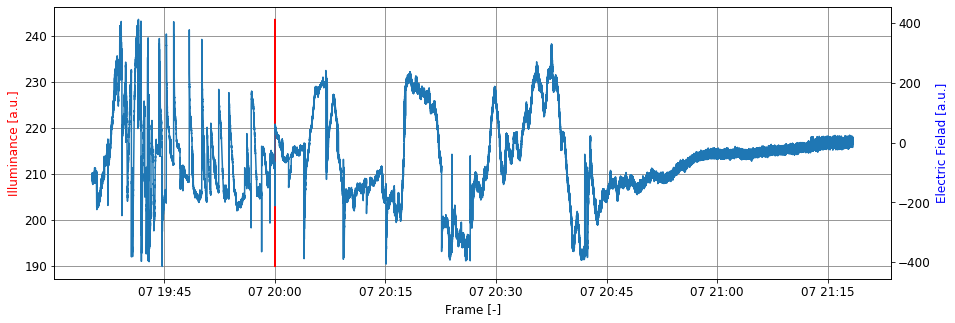

In [92]:
snap_time = 620 # us

yy = y

t0 = pd.to_datetime(time0)
time1st = t0  - pd.to_timedelta(1000, unit='ms')
yy['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 

xx = df.loc['2021-08-07 19:59:55':'2021-08-07 20:00:5']
xx = df

yy.set_index('time', inplace=True, drop=False)
yy.sort_index(inplace=True)

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(y['0'], color='red')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.xlabel('Frame [-]')
plt.ylabel('Illuminance [a.u.]', color='red')

plt.twinx()

plt.plot(xx[0])
plt.ylabel('Electric Fielad [a.u.]', color='blue')
plt.xlabel('UTC')




/storage/experiments/2021/0807_bourka_sobeslav/video/1628429742.3892598.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429832.9127116.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628429929.155008.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430023.4697387.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv
/storage/experiments/2021/0807_bourka_sobesl

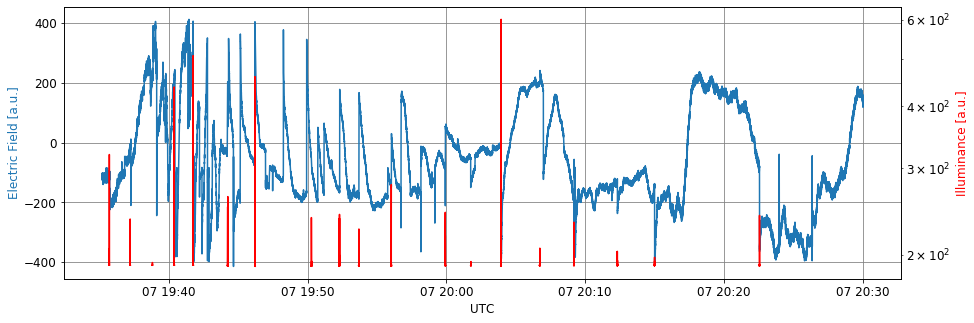

In [89]:
camera = [['/storage/experiments/2021/0807_bourka_sobeslav/video/1628429742.3892598.mp4','2021-08-07 19:35:42.822'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628429832.9127116.mp4','2021-08-07 19:37:13.390'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628429929.155008.mp4','2021-08-07 19:38:49.606'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430023.4697387.mp4','2021-08-07 19:40:23.894'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430105.617505.mp4','2021-08-07 19:41:46.096'],

['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4','2021-08-07 19:44:15.210'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4','2021-08-07 19:46:13.206'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4','2021-08-07 19:50:17.216'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4','2021-08-07 19:52:18.000'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4','2021-08-07 19:53:42.295'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4','2021-08-07 19:56:2.268'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4','2021-08-07 19:59:56.015'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4','2021-08-07 20:1:46.787'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431436.5650537.mp4','2021-08-07 20:3:57.004'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4','2021-08-07 20:6:44.208'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4','2021-08-07 20:9:12.291'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431306.3418453.mp4','2021-08-07 20:12:19.737'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4','2021-08-07 20:15:0.592'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432553.653221.mp4','2021-08-07 20:22:34.107']]


snap_time = 620 # us

xx = df.loc['2021-08-07 19:00:00':'2021-08-07 20:30:0']
#xx = df

plt.figure(figsize=(15,5))
plt.rc('font', size=12)    

plt.plot(xx[0])
plt.ylabel('Electric Field [a.u.]', c='#1f77b4')
plt.xlabel('UTC')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')

plt.twinx()

count = 0
for cam, tt in camera:
    f = cam + '.csv'
    time0 = tt

    timediff = -1200 # ms

    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f)

    t0 = pd.to_datetime(time0)
    time1st = t0  - pd.to_timedelta(1000, unit='ms')
    y['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 
    y.set_index('time', inplace=True, drop=False)
    y.sort_index(inplace=True)

    plt.yscale('log')
    if (count<5):
        plt.plot(y['0']*2+190, color='red')
    else:
        plt.plot(y['0'], color='red')
        
    count +=1
    
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.xlabel('UTC')
    plt.ylabel('Illuminance [a.u.]', color='red')


/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431436.5650537.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4.csv
/storage/experiments/2021/0807_bourka_sobeslav/video/1628431306.3418453.mp4.csv
/storage/experiments/2021/0807_bourka_sobes

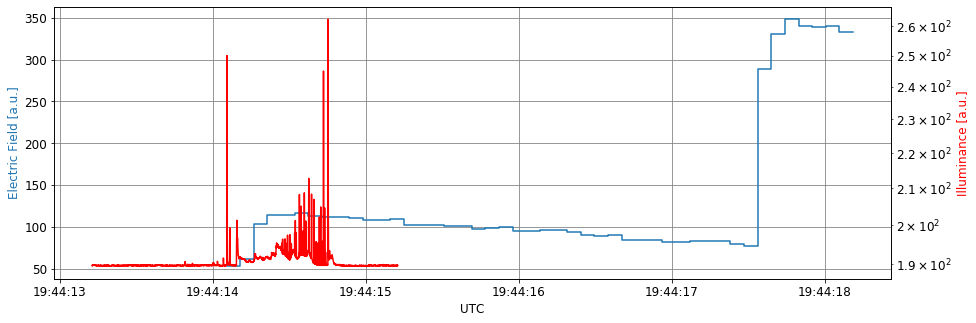

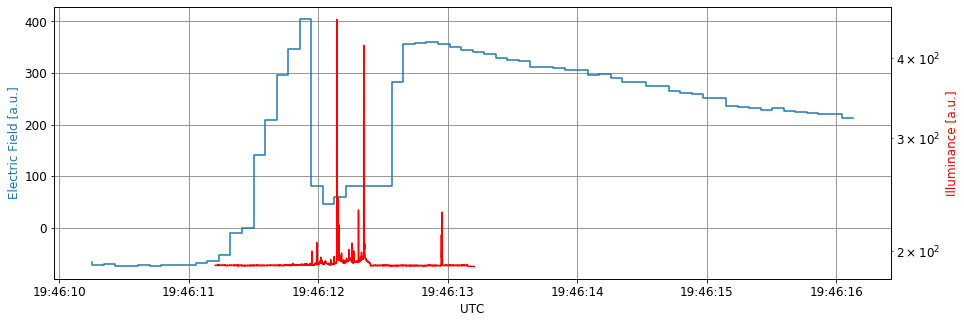

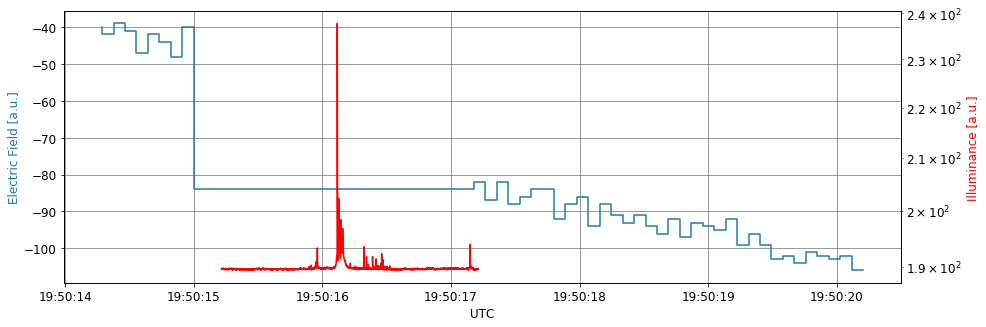

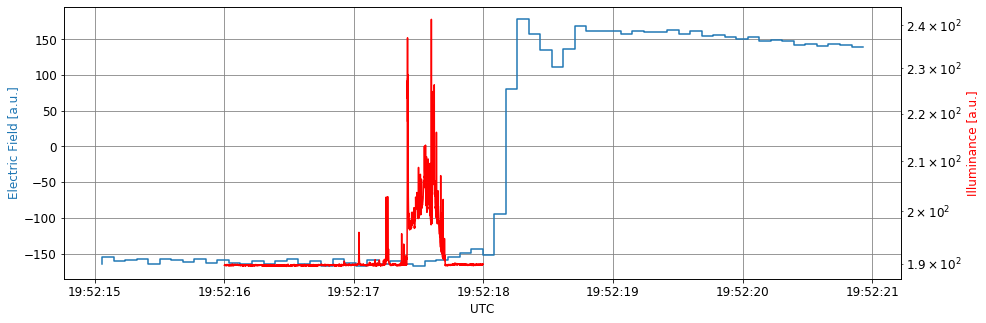

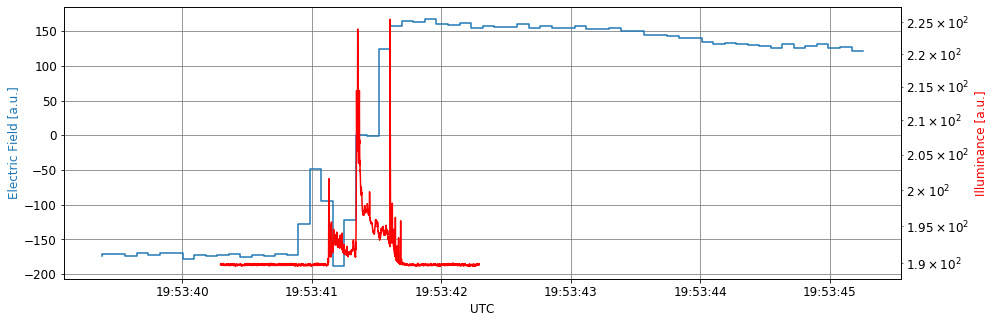

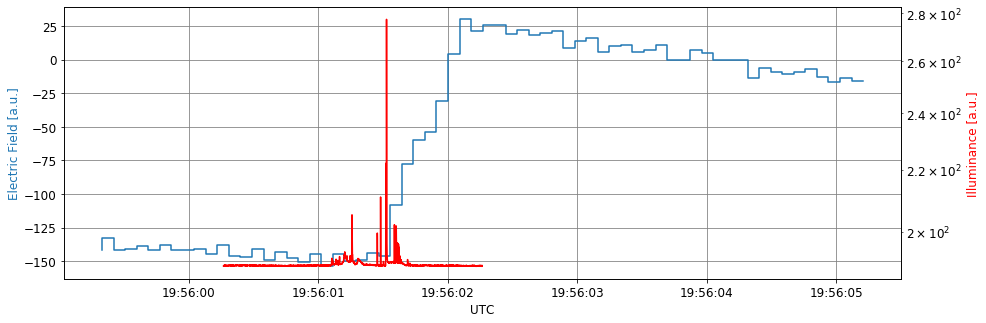

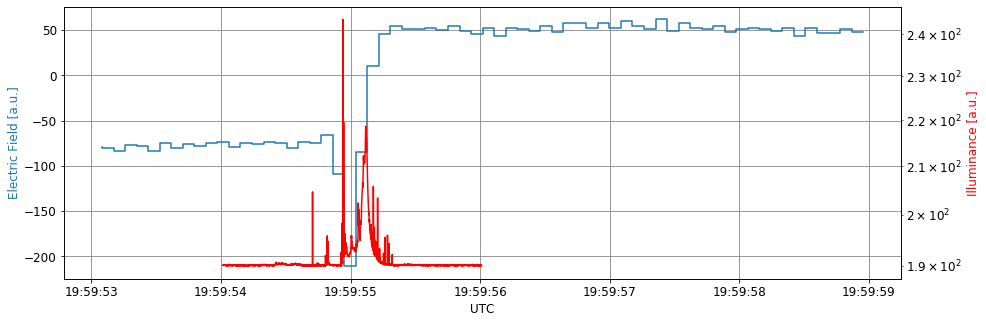

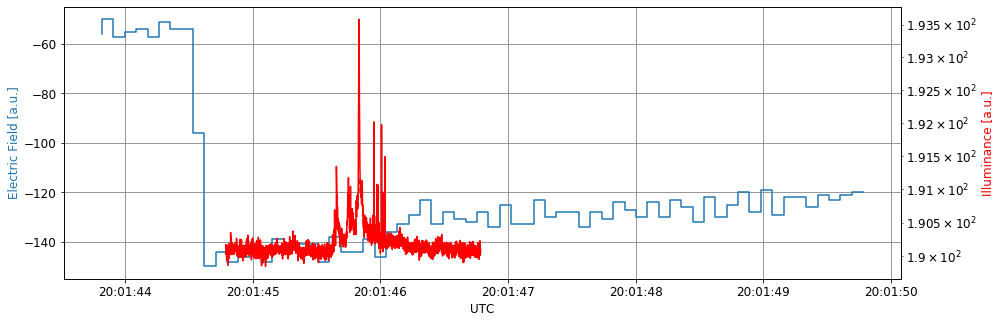

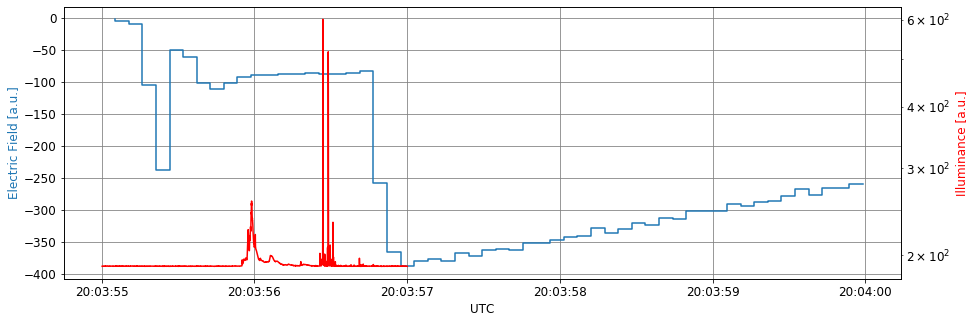

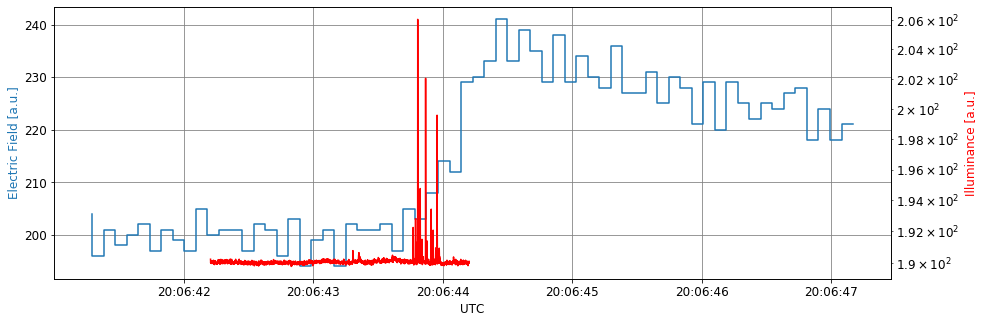

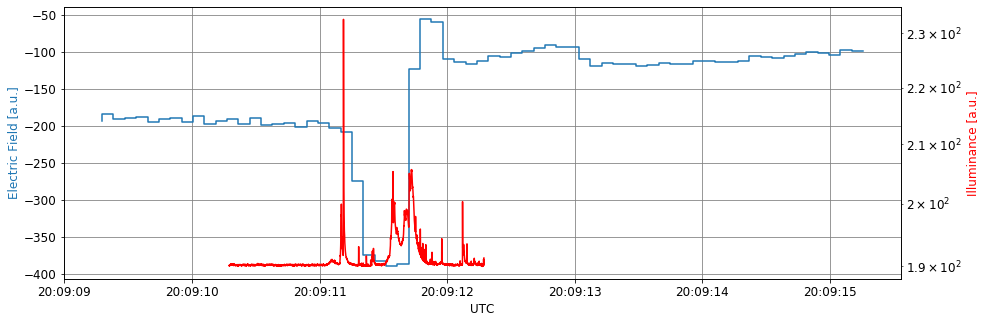

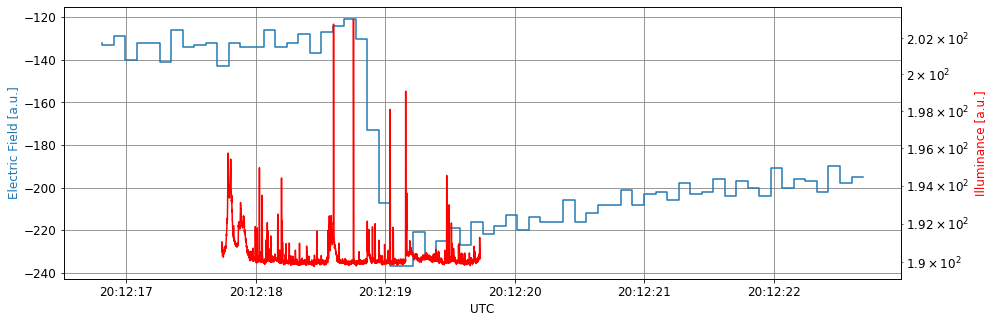

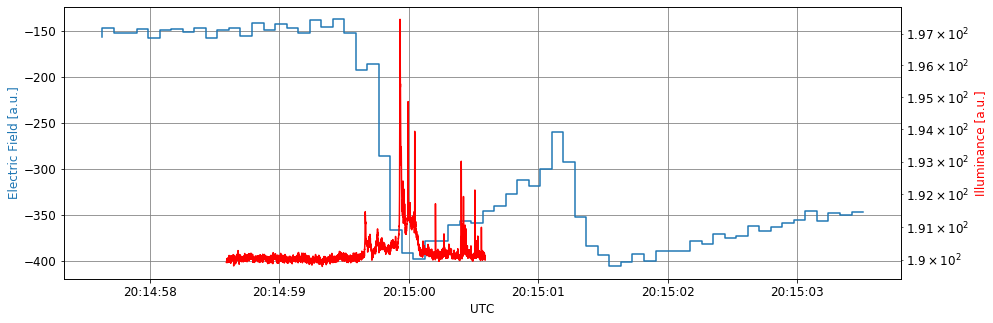

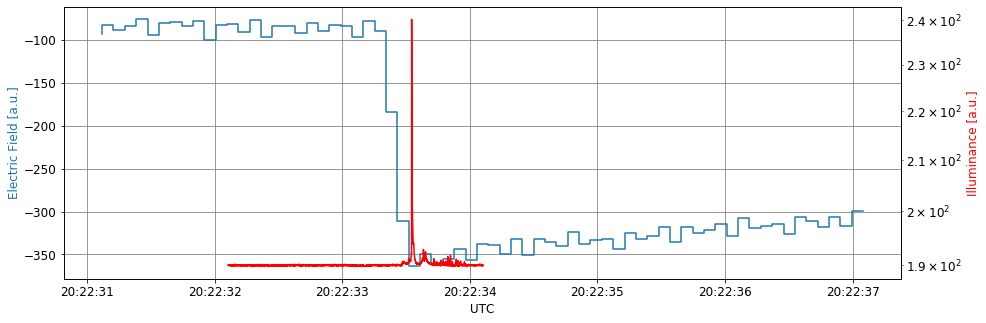

In [91]:
camera = [['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430254.7804074.mp4','2021-08-07 19:44:15.210'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430372.7465947.mp4','2021-08-07 19:46:13.206'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430616.798702.mp4','2021-08-07 19:50:17.216'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430738.2769208.mp4','2021-08-07 19:52:18.000'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430821.820973.mp4','2021-08-07 19:53:42.295'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628430961.7903373.mp4','2021-08-07 19:56:2.268'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431195.5110645.mp4','2021-08-07 19:59:56.015'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431939.2651453.mp4','2021-08-07 20:1:46.787'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431436.5650537.mp4','2021-08-07 20:3:57.004'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431603.790285.mp4','2021-08-07 20:6:44.208'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431751.8549378.mp4','2021-08-07 20:9:12.291'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628431306.3418453.mp4','2021-08-07 20:12:19.737'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432100.1519039.mp4','2021-08-07 20:15:0.592'],
['/storage/experiments/2021/0807_bourka_sobeslav/video/1628432553.653221.mp4','2021-08-07 20:22:34.107']]

snap_time = 620 # us

for cam, tt in camera:
    f = cam + '.csv'
    time0 = tt

    timediff = -1000 # ms

    s = f.split('/')
    st = s[len(s)-1]
    print(f)
    y = pd.read_csv(f)

    t0 = pd.to_datetime(time0)
    time1st = t0  - pd.to_timedelta(1000, unit='ms')
    y['time'] = time1st + pd.to_timedelta(y.index * snap_time, unit='us') + pd.to_timedelta(timediff, unit='ms') 
    y.set_index('time', inplace=True, drop=False)
    y.sort_index(inplace=True)

    plt.figure(figsize=(15,5))
    plt.rc('font', size=12)    

    xx = df.loc[df.index > t0 - pd.to_timedelta(3, unit='s')]
    xx = xx.loc[xx.index < t0 + pd.to_timedelta(3, unit='s')]

    plt.plot(xx[0], drawstyle='steps-pre')
    plt.ylabel('Electric Field [a.u.]', c='#1f77b4')
    plt.xlabel('UTC')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='-')

    plt.twinx()
    
    plt.yscale('log')
    plt.plot(y['0'], color='red')
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.xlabel('UTC')
    plt.ylabel('Illuminance [a.u.]', color='red')


# GPS

In [14]:
l=[]
l.extend(range(0,15))
gps = pd.read_table(directory + '/gps/ratmirov.txt', sep=',', header=None, names=l)
gps = gps[gps[0]=='# TIM_TM2: ch=0']
gps['ToW'] = gps[4].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(int)
gps['R'] = gps[5].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(int)/1000
gps['F'] = gps[7].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(int)/1000


In [15]:
gps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,ToW,R,F
12,# TIM_TM2: ch=0,flags=213,count=1,wnR=2168,wnF=2168,towMsR=64373737,towSubMsR=198023,towMsF=64373772,towSubMsF=63192,accEst=72,NaN,NaN,NaN,NaN,NaN,2168,64373.737,64373.772
19,# TIM_TM2: ch=0,flags=213,count=2,wnR=2168,wnF=2168,towMsR=64455161,towSubMsR=155047,towMsF=64455199,towSubMsF=12988,accEst=24,NaN,NaN,NaN,NaN,NaN,2168,64455.161,64455.199
26,# TIM_TM2: ch=0,flags=213,count=3,wnR=2168,wnF=2168,towMsR=64500345,towSubMsR=886241,towMsF=64500383,towSubMsF=775973,accEst=24,NaN,NaN,NaN,NaN,NaN,2168,64500.345,64500.383
38,# TIM_TM2: ch=0,flags=209,count=10,wnR=2168,wnF=2168,towMsR=64929810,towSubMsR=588858,towMsF=64908171,towSubMsF=886530,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,64929.810,64908.171
45,# TIM_TM2: ch=0,flags=209,count=11,wnR=2168,wnF=2168,towMsR=64956953,towSubMsR=70633,towMsF=64930585,towSubMsF=310669,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,64956.953,64930.585
52,# TIM_TM2: ch=0,flags=209,count=12,wnR=2168,wnF=2168,towMsR=64992381,towSubMsR=24626,towMsF=64958568,towSubMsF=331691,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,64992.381,64958.568
60,# TIM_TM2: ch=0,flags=209,count=13,wnR=2168,wnF=2168,towMsR=65018739,towSubMsR=545687,towMsF=64993996,towSubMsF=261851,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65018.739,64993.996
67,# TIM_TM2: ch=0,flags=241,count=14,wnR=2168,wnF=2168,towMsR=65028225,towSubMsR=509756,towMsF=65017354,towSubMsF=789599,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65028.225,65017.354
74,# TIM_TM2: ch=0,flags=241,count=15,wnR=2168,wnF=2168,towMsR=65043124,towSubMsR=532889,towMsF=65029840,towSubMsF=770272,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65043.124,65029.840
86,# TIM_TM2: ch=0,flags=241,count=16,wnR=2168,wnF=2168,towMsR=65121198,towSubMsR=559947,towMsF=65044739,towSubMsF=792010,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65121.198,65044.739


In [4]:
import datetime

_gps_epoch_datetime: datetime.datetime = datetime.datetime(1980, 1, 6)

def tow2datetime(
    week_num: int, tow: float) -> datetime.datetime:
    """Convert GPS Week and Time of Week to datetime.

    The purpose of this function is to convert a GPS Week number and a time of
    week into a DateTime object. The week number represents the number of weeks
    since 6 January 1980 and the time of week is the number of seconds since
    midnight Sunday night. Note that the GPS week is sometimes expressed as a
    mod 1024 week. If this is the case, the Year argument can be used to
    correct for mod 1024 weeks. If the week number is not consistent with the
    Year, then an error is raised.

    Parameters
    ----------
    week_num : int
        GPS Week Number (not limited to 1024)
    tow : float
        Time of Week (seconds since midnight Sunday Morning)

    Returns
    -------
    datetime.datetime
        object that represents the current time

    """
    
    date_time_out = (
        _gps_epoch_datetime
        + datetime.timedelta(days=week_num * 7)
        + datetime.timedelta(seconds=tow)
    )

    # Return a datetime object that stores the current week
    return date_time_out



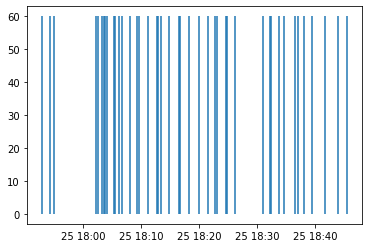

In [34]:
gps['time'] = gps.apply(lambda x: tow2datetime(int(x[4]), float(x[5])), axis=1)
plt.vlines(x=gps['time'], ymin=0, ymax=60)


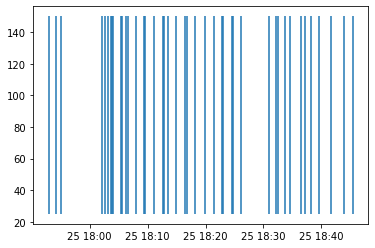

In [11]:
def weeksecondstoutc(gpsweek,gpsseconds,leapseconds):
    import datetime, calendar
    datetimeformat = "%Y-%m-%d %H:%M:%S.%f"
    epoch = datetime.datetime.strptime("1980-01-06 00:00:00.000",datetimeformat)
    elapsed = datetime.timedelta(days=(gpsweek*7),seconds=(gpsseconds+leapseconds))
    return datetime.datetime.strftime(epoch + elapsed,datetimeformat)


print(weeksecondstoutc(2168,67088.231,0)) ## --> '2014-09-22 21:36:52'
print(weeksecondstoutc(2168,67027.570,0)) ## --> '2014-09-22 21:36:52'
# TIM_TM2: ch=0, flags=241, count=45, wnR=2168, wnF=2168, towMsR=67088231, towSubMsR=624565, towMsF=67027570, towSubMsF=123292, accEst=23
#$HIT,45,2021-07-25 18:38:08.937082,1627303088.2316246,2021-07-26 12:38:08.231625
#2021-07-25 18:38:8.231

print(weeksecondstoutc(2168,67302.498,0)) ## --> '2014-09-22 21:36:52'
print(weeksecondstoutc(2168,67175.165,0)) ## --> '2014-09-22 21:36:52'
# TIM_TM2: ch=0, flags=241, count=47, wnR=2168, wnF=2168, towMsR=67302498, towSubMsR=69767, towMsF=67175165, towSubMsF=629857, accEst=23
#$HIT,47,2021-07-25 18:41:43.139431,1627303302.4980698,2021-07-26 12:41:42.498070

print(weeksecondstoutc(2168,67437.929,0)) ## --> '2014-09-22 21:36:52'
print(weeksecondstoutc(2168,67304.213,0)) ## --> '2014-09-22 21:36:52'
# TIM_TM2: ch=0, flags=241, count=48, wnR=2168, wnF=2168, towMsR=67437929, towSubMsR=353197, towMsF=67304213, towSubMsF=308257, accEst=23
#$HIT,48,2021-07-25 18:43:58.640022,1627303437.9293532,2021-07-26 12:43:57.929353


2021-07-25 18:38:08.231000
2021-07-25 18:37:07.570000
2021-07-25 18:41:42.498000
2021-07-25 18:39:35.165000
2021-07-25 18:43:57.929000
2021-07-25 18:41:44.213000


In [23]:
gps['timeR'] = gps.apply(lambda x: weeksecondstoutc(int(x['ToW']), float(x['R']),18), axis=1)
gps['timeF'] = gps.apply(lambda x: weeksecondstoutc(int(x['ToW']), float(x['F']),18), axis=1)


In [24]:
gps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,ToW,R,F,timeR,timeF
12,# TIM_TM2: ch=0,flags=213,count=1,wnR=2168,wnF=2168,towMsR=64373737,towSubMsR=198023,towMsF=64373772,towSubMsF=63192,accEst=72,NaN,NaN,NaN,NaN,NaN,2168,64373.737,64373.772,2021-07-25 17:53:11.737000,2021-07-25 17:53:11.772000
19,# TIM_TM2: ch=0,flags=213,count=2,wnR=2168,wnF=2168,towMsR=64455161,towSubMsR=155047,towMsF=64455199,towSubMsF=12988,accEst=24,NaN,NaN,NaN,NaN,NaN,2168,64455.161,64455.199,2021-07-25 17:54:33.161000,2021-07-25 17:54:33.199000
26,# TIM_TM2: ch=0,flags=213,count=3,wnR=2168,wnF=2168,towMsR=64500345,towSubMsR=886241,towMsF=64500383,towSubMsF=775973,accEst=24,NaN,NaN,NaN,NaN,NaN,2168,64500.345,64500.383,2021-07-25 17:55:18.345000,2021-07-25 17:55:18.383000
38,# TIM_TM2: ch=0,flags=209,count=10,wnR=2168,wnF=2168,towMsR=64929810,towSubMsR=588858,towMsF=64908171,towSubMsF=886530,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,64929.810,64908.171,2021-07-25 18:02:27.810000,2021-07-25 18:02:06.171000
45,# TIM_TM2: ch=0,flags=209,count=11,wnR=2168,wnF=2168,towMsR=64956953,towSubMsR=70633,towMsF=64930585,towSubMsF=310669,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,64956.953,64930.585,2021-07-25 18:02:54.953000,2021-07-25 18:02:28.585000
52,# TIM_TM2: ch=0,flags=209,count=12,wnR=2168,wnF=2168,towMsR=64992381,towSubMsR=24626,towMsF=64958568,towSubMsF=331691,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,64992.381,64958.568,2021-07-25 18:03:30.381000,2021-07-25 18:02:56.568000
60,# TIM_TM2: ch=0,flags=209,count=13,wnR=2168,wnF=2168,towMsR=65018739,towSubMsR=545687,towMsF=64993996,towSubMsF=261851,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65018.739,64993.996,2021-07-25 18:03:56.739000,2021-07-25 18:03:31.996000
67,# TIM_TM2: ch=0,flags=241,count=14,wnR=2168,wnF=2168,towMsR=65028225,towSubMsR=509756,towMsF=65017354,towSubMsF=789599,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65028.225,65017.354,2021-07-25 18:04:06.225000,2021-07-25 18:03:55.354000
74,# TIM_TM2: ch=0,flags=241,count=15,wnR=2168,wnF=2168,towMsR=65043124,towSubMsR=532889,towMsF=65029840,towSubMsF=770272,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65043.124,65029.840,2021-07-25 18:04:21.124000,2021-07-25 18:04:07.840000
86,# TIM_TM2: ch=0,flags=241,count=16,wnR=2168,wnF=2168,towMsR=65121198,towSubMsR=559947,towMsF=65044739,towSubMsF=792010,accEst=23,NaN,NaN,NaN,NaN,NaN,2168,65121.198,65044.739,2021-07-25 18:05:39.198000,2021-07-25 18:04:22.739000
